# Portfolio Manager

#### Barış Anılır 21827043


## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## Problem <a class="anchor" id="problem"></a>

Describe the problem here. What are the questions you are trying to solve?

Our goal in this project is to create a portfolio in line with the user's wishes and make money by trading.

## Data Understanding<a class="anchor" id="data_understanding"></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

What data set are you going to use? Where will you get it from? Describe your data.

We have many columns in our data. We will only use the closing price "close" and the date information "date".

In [219]:
df_ada = pd.read_csv('data/ADA.csv')[["Date","Close"]].set_index("Date").rename(columns={"Close":"ADA"})
df_bnb = pd.read_csv('data/BNB.csv')[["Date","Close"]].set_index("Date").rename(columns={"Close":"BNB"})
df_btc = pd.read_csv('data/BTC.csv')[["Date","Close"]].set_index("Date").rename(columns={"Close":"BTC"})
df_eth = pd.read_csv('data/ETH.csv')[["Date","Close"]].set_index("Date").rename(columns={"Close":"ETH"})
df_etc = pd.read_csv('data/ETC.csv')[["Date","Close"]].set_index("Date").rename(columns={"Close":"ETC"})
df_xrp = pd.read_csv('data/XRP.csv')[["Date","Close"]].set_index("Date").rename(columns={"Close":"XRP"})
df_ltc = pd.read_csv('data/LTC.csv')[["Date","Close"]].set_index("Date").rename(columns={"Close":"LTC"})

In [220]:
df = pd.concat([df_ada,df_bnb,df_btc,df_eth,df_etc,df_xrp,df_ltc], axis=1)

In [221]:
df

,ADA,BNB,BTC,ETH,ETC,XRP,LTC
Date,,,,,,,
2017-12-31,0.7100,8.63558,13850.4,736.77,26.05,1.9800,227.17
2018-01-01,0.7022,8.41461,13444.9,752.46,29.23,2.0500,225.22
2018-01-02,0.7620,8.83777,14754.1,858.78,31.87,2.1900,253.31
2018-01-03,1.0800,9.53588,15156.6,942.01,33.11,2.7300,244.99
2018-01-04,1.1043,9.21399,15180.1,940.00,33.77,2.7300,238.91
...,...,...,...,...,...,...,...
2017-11-04,NaN,NaN,7363.8,299.48,11.77,0.2015,55.09
2017-11-05,NaN,NaN,7389.5,295.63,13.10,0.1997,54.67
2017-11-06,NaN,NaN,6959.2,296.90,13.84,0.2013,54.60


In [222]:
df.index = pd.to_datetime(df.index)

In [224]:
df.sort_index()

,ADA,BNB,BTC,ETH,ETC,XRP,LTC
Date,,,,,,,
2010-07-18,NaN,NaN,0.1,NaN,NaN,NaN,NaN
2010-07-19,NaN,NaN,0.1,NaN,NaN,NaN,NaN
2010-07-20,NaN,NaN,0.1,NaN,NaN,NaN,NaN
2010-07-21,NaN,NaN,0.1,NaN,NaN,NaN,NaN
2010-07-22,NaN,NaN,0.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-03-31,1.1415,428.916107,45525.0,3282.35,47.4870,0.81504,123.8
2022-04-01,1.1656,446.604279,46297.0,3456.18,47.1946,0.82774,124.8
2022-04-02,1.1551,436.955353,45811.0,3442.34,45.5294,0.82369,124.7


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4279 entries, 2017-12-31 to 2017-11-08
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ADA     1556 non-null   float64
 1   BNB     1608 non-null   float64
 2   BTC     4279 non-null   float64
 3   ETH     2217 non-null   float64
 4   ETC     2077 non-null   float64
 5   XRP     2630 non-null   float64
 6   LTC     2050 non-null   float64
dtypes: float64(7)
memory usage: 267.4 KB


In [226]:
df.describe()

,ADA,BNB,BTC,ETH,ETC,XRP,LTC
count,1556.000000,1608.000000,4279.000000,2217.000000,2077.000000,2630.000000,2050.000000
mean,0.498524,122.101487,7653.128465,780.178209,15.982259,0.346180,88.955832
std,0.678504,185.465113,14313.777443,1140.711306,17.760364,0.380477,69.161786
min,0.023200,1.510360,0.100000,6.700000,0.743500,0.003560,3.500000
25%,0.054975,13.200187,111.750000,133.990000,5.023100,0.008600,43.663000
50%,0.113600,20.329348,637.400000,248.980000,8.142200,0.252370,61.846500
75%,0.928475,234.135826,8183.900000,703.020000,18.510000,0.479693,132.603000
max,2.965200,675.684082,67527.900000,4808.380000,133.845500,2.780000,386.820000


In [227]:
df.dropna(inplace=True)

In [228]:
df

,ADA,BNB,BTC,ETH,ETC,XRP,LTC
Date,,,,,,,
2017-12-31,0.7100,8.635580,13850.4,736.77,26.0500,1.98000,227.17
2018-01-01,0.7022,8.414610,13444.9,752.46,29.2300,2.05000,225.22
2018-01-02,0.7620,8.837770,14754.1,858.78,31.8700,2.19000,253.31
2018-01-03,1.0800,9.535880,15156.6,942.01,33.1100,2.73000,244.99
2018-01-04,1.1043,9.213990,15180.1,940.00,33.7700,2.73000,238.91
...,...,...,...,...,...,...,...
2022-03-31,1.1415,428.916107,45525.0,3282.35,47.4870,0.81504,123.80
2022-04-01,1.1656,446.604279,46297.0,3456.18,47.1946,0.82774,124.80
2022-04-02,1.1551,436.955353,45811.0,3442.34,45.5294,0.82369,124.70


## Data Preparation<a class="anchor" id="data_preparation"></a>

In [10]:
url_list = ['data/ADA.csv','data/BNB.csv','data/BTC.csv','data/ETH.csv','data/ETC.csv','data/XRP.csv','data/LTC.csv']
name_list = ["ADA","BNB","BTC","ETH","ETC","XRP","LTC"]

In [11]:
def readData(url_list):
    temp_list = list()
    for i in url_list:
        temp_list.append(pd.read_csv(i)[["Date","Close"]].set_index("Date"))
    return temp_list

def prepareFilterTrainData(coin_list,name_list):
    temp_list = list()
    for i in range(len(coin_list)):
        temp_df = coin_list[i][ coin_list[i].index > '2018-01-02'].rename(columns={"Close":"{}".format(name_list[i])})
        temp_df = temp_df[temp_df.index < '2020-06-02']
        temp_list.append(temp_df)
    coins = pd.concat(temp_list, axis=1)
    return coins

def prepareFilterTestData(coin_list,name_list):
    temp_list = list()
    for i in range(len(coin_list)):
        temp_list.append(coin_list[i][ coin_list[i].index >= '2020-06-02'])
    coins = pd.concat(temp_list, axis=1)
    return coins

In [12]:
df_allCoins = readData(url_list)
train_coins = prepareFilterTrainData(df_allCoins,name_list)
test_coins = prepareFilterTestData(df_allCoins,name_list)

In [32]:
print(train_coins)

               ADA        BNB      BTC      ETH      ETC      XRP      LTC
Date                                                                      
2018-01-03  1.0800   9.535880  15156.6   942.01  33.1100  2.73000  244.990
2018-01-04  1.1043   9.213990  15180.1   940.00  33.7700  2.73000  238.910
2018-01-05  0.9949  14.917200  16954.8   962.77  31.1600  2.51000  246.230
2018-01-06  1.0358  22.759800  17172.3  1004.30  34.0000  2.65000  279.420
2018-01-07  1.0060  18.656799  16228.2  1115.80  35.4500  2.78000  272.060
...            ...        ...      ...      ...      ...      ...      ...
2020-05-28  0.0650  17.059340   9572.2   220.18   6.8593  0.20046   44.723
2020-05-29  0.0647  17.041630   9424.8   220.66   7.2259  0.19758   44.503
2020-05-30  0.0769  17.743418   9692.5   243.63   7.4913  0.20703   47.746
2020-05-31  0.0742  17.040472   9454.8   231.81   6.9407  0.20254   45.611
2020-06-01  0.0809  17.914942  10189.3   247.97   7.1995  0.21090   48.201

[881 rows x 7 columns]


Explain what kind of data transformations, feature selection and/or engineering you will perform.

To use only the "close" and "date" columns, we pulled them from the database and used the "date" column as an index.
We used the date range 2018-01-02 and 2020-06-02 to create the train data, and the data between 2020-06-02 - 2022-04-04 to create the test data.

## 4.Modeling<a class="anchor" id="modeling"></a>
### 4.1 Portfolio Optimization

In [42]:
from pypfopt import EfficientFrontier, risk_models,expected_returns,plotting
pd.options.mode.chained_assignment = None  # default='warn'

Which model will be used? Why? What parameters?

We used the PyPortfolioOpt library for portfolio optimization. We offered the user two options. One is less and the other is very risky.
We made a basket of coins with the lowest volatility in the least risky, and the most profitable coins.
For the very risky, we chose the coins with high volatility and the highest profit. If the user chooses 0 in the function, it creates a low risk portfolio, and if he chooses 1, it creates a risky portfolio.

In [137]:
def portfolio(option):
    
    mu = expected_returns.mean_historical_return(train_coins,frequency=304)
    
    S = risk_models.sample_cov(train_coins,frequency=304)
    
    ef = EfficientFrontier(mu,S)
    
    if option == 0:
        weights = ef.min_volatility()
    elif option == 1:
        weights = ef.max_sharpe()
    
    ef.portfolio_performance(verbose=True)
    
    
    return weights

In [138]:
weights = portfolio(0)


Expected annual return: -15.9%
Annual volatility: 72.5%
Sharpe Ratio: -0.25


You can see which coins are in the portfolio and their weights.

In [139]:
weights

OrderedDict([('ADA', 0.0),
             ('BNB', 0.0300472258955517),
             ('BTC', 0.8786919539456169),
             ('ETH', 0.0),
             ('ETC', 0.0),
             ('XRP', 0.0912608201588313),
             ('LTC', 0.0)])

### 4.2 Training Model

We used a linear regression basis for trading in this project.
By regressing with a fixed interval, we obtained a straight slope and developed a trading strategy using this slope. We found the fixed range I just mentioned by training on training_data below.

The model performs linear regression in the 56-day interval and orders sell when the slope of the line changes from positive to negative, and buy when it turns from negative to positive.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.style.use("fivethirtyeight")
pd.options.mode.chained_assignment = None  # default='warn'

The parameter value of the Train function is the regression range we have determined. The stop_mik value represents a stop loss at 10%.

In [44]:
def lineer_model(df,parameter,stop_mik):
    
    start = 0
    positive = False
    islemler = list()
    for i in range(len(df)-parameter):
        #df3 = df[start:start+parameter]
        df3 = df.iloc[start:start+parameter]
        df3["Numbers"] = list(range(0,len(df3)))

        X = np.array(df3[["Numbers"]])

        y = df3[:]["Close"].values

        lin_model = LinearRegression().fit(X,y)

        ### regression a göre al sat
        if ((lin_model.coef_[0] > 0) and positive == False):
                islemler.append([df3.index[-1],"al",df3["Close"].iloc[-1]])
                positive = True

        if (lin_model.coef_[0] < 0 and positive == True) :
                islemler.append([df3.index[-1],"sat",df3["Close"].iloc[-1]])
                positive = False

        if (stop_mik != 0):
            
            ### Stop 

            if (len(islemler) != 0):
                son = df3["Close"].iloc[-1]
                ilk = islemler[-1][2]
                if islemler[-1][1] == "al":
                    if ((ilk-son)/ilk >= stop_mik):
                        islemler.append([df3.index[-1],"al-stop",son])


                elif islemler[-1][1] == "sat":
                    if ((son-ilk)/ilk >= stop_mik):
                        islemler.append([df3.index[-1],"sat-stop",son])

        start+=1
    islemler.append([df.index[-1],"now",df["Close"].iloc[-1]])
    return islemler

The test function performs the transactions according to the list of buy and sell transactions from the linear_regression function and returns the transaction details.

In [195]:
def test(islemler,ana):
    
    info = list()
    i = 0
    

    while (i < len(islemler)):
        if (i != len(islemler)-1):
            kar = 0

            if islemler[i][1] == "al":
                if (islemler[i+1][1] == "al-stop"):
                    kar = (islemler[i+1][2]-islemler[i][2])/islemler[i][2]
                elif (islemler[i+1][1] == "sat"):
                    kar = (islemler[i+1][2]-islemler[i][2])/islemler[i][2]
                elif (islemler[i+1][1] == "now"):
                    kar = (islemler[i+1][2]-islemler[i][2])/islemler[i][2]

                
            elif islemler[i][1] == "sat":

                if (islemler[i+1][1] == "sat-stop"):

                    kar = (islemler[i][2]-islemler[i+1][2])/islemler[i][2]

                elif (islemler[i+1][1] == "al"):
                    kar = ((islemler[i][2]-islemler[i+1][2])/islemler[i][2])
                
                elif (islemler[i+1][1] == "now"):
                    kar = (islemler[i][2]-islemler[i+1][2])/islemler[i][2]
                

                
                
            ana = ana + (ana * kar)

            info.append("Tarih: {} Emir: {} Coin'in fiyatı : {} Kar/Zarar Yüzdesi {} Toplam Para: {}".format(islemler[i][0],islemler[i][1],islemler[i][2],round(kar,3),ana))
        
        else:
            
            info.append("Coin Anlık Fiyat : {}".format(islemler[i][2]))

        i+=1
    
    return [ana,info]

In [183]:
def trainOptimalValues():
    x_deg = list()
    y_deg = list()
    print("Yatırılan para : 1000")
    test_df = pd.DataFrame({'index':train_coins["BTC"].index, 'Close':train_coins["BTC"].values})
    
    max_deg = 0
    for i in range(35,65):
            islemler = lineer_model(test_df,i,0.1)
            ana = test(islemler,1000)[0]
            if ana > max_deg:
                max_deg = ana
            print("Regresyon aralığı :{} gün , Para : {}".format(i,ana))
            x_deg.append(i)
            y_deg.append(ana)
    return [x_deg,y_deg]

In [186]:
deg = trainOptimalValues()

Yatırılan para : 1000
Regresyon aralığı :35 gün , Para : 2340.401178564283
Regresyon aralığı :36 gün , Para : 2510.45183564884
Regresyon aralığı :37 gün , Para : 2137.0202278285424
Regresyon aralığı :38 gün , Para : 1859.6102246888508
Regresyon aralığı :39 gün , Para : 1673.2508297781606
Regresyon aralığı :40 gün , Para : 2016.0730382220497
Regresyon aralığı :41 gün , Para : 1503.7670488363374
Regresyon aralığı :42 gün , Para : 1458.1399745845215
Regresyon aralığı :43 gün , Para : 1581.1828056009624
Regresyon aralığı :44 gün , Para : 1502.9941744264972
Regresyon aralığı :45 gün , Para : 1438.5066901656808
Regresyon aralığı :46 gün , Para : 2160.1091008771773
Regresyon aralığı :47 gün , Para : 1690.2174190704977
Regresyon aralığı :48 gün , Para : 1303.8351344102477
Regresyon aralığı :49 gün , Para : 1339.0943839884342
Regresyon aralığı :50 gün , Para : 1138.98045347785
Regresyon aralığı :51 gün , Para : 1383.193805238547
Regresyon aralığı :52 gün , Para : 1438.485096338401
Regresyon ara

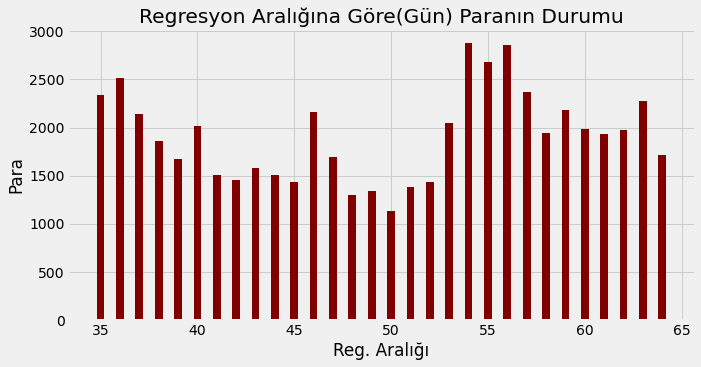

In [187]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(deg[0], deg[1], color ='maroon',
        width = 0.4)
 
plt.xlabel("Reg. Aralığı")
plt.ylabel("Para")
plt.title("Regresyon Aralığına Göre(Gün) Paranın Durumu")
plt.show()

Thanks to the trainOptimalValue function, we found the regression range and changed the value 56. Now our model will try to generate a signal by regressing every 56 days.

## Evaluation<a class="anchor" id="evaluation"></a>

We set our budget as 1000. And we divided it into pieces according to portfolio weight and invested in coins.

In [151]:
budget = 1000

You can see the transactions of our model below for each coin. You can access profit percentage and money information after each transaction.

In [200]:
islemler = list()
test_sonuc = list()


for i,j in weights.items():
    if j != 0:
        
        index = name_list.index(i)
        test_df = pd.DataFrame({'index':test_coins.iloc[:,index].index, 'Close':test_coins.iloc[:,index].values})
        test_df = test_df.set_index("index")
        test_df.index = pd.to_datetime(test_df.index)
        
        islem = lineer_model(test_df,56,0.1)
        islemler.append(islem)
        
        pay = budget * j
        
        sonuc = test(islem,pay)
        
        test_sonuc.append([i,pay,sonuc[0]])

        
        print("--------------------{} Coin İşlem Takibi--------------".format(i))
        for k in sonuc[1]:
            print(k)

--------------------BNB Coin İşlem Takibi--------------
Tarih: 2020-07-27 00:00:00 Emir: al Coin'in fiyatı : 19.62032890319824 Kar/Zarar Yüzdesi 0.473 Toplam Para: 44.246166626289074
Tarih: 2020-11-20 00:00:00 Emir: sat Coin'in fiyatı : 28.891996383666992 Kar/Zarar Yüzdesi -0.17 Toplam Para: 36.72506195142927
Tarih: 2020-11-24 00:00:00 Emir: al Coin'in fiyatı : 33.80315017700195 Kar/Zarar Yüzdesi -0.166 Toplam Para: 30.642921799431434
Tarih: 2020-11-26 00:00:00 Emir: al-stop Coin'in fiyatı : 28.20491600036621 Kar/Zarar Yüzdesi 0 Toplam Para: 30.642921799431434
Tarih: 2020-11-27 00:00:00 Emir: sat Coin'in fiyatı : 28.475187301635746 Kar/Zarar Yüzdesi -0.102 Toplam Para: 27.503214635935134
Tarih: 2020-11-30 00:00:00 Emir: sat-stop Coin'in fiyatı : 31.392786026000977 Kar/Zarar Yüzdesi 0 Toplam Para: 27.503214635935134
Tarih: 2020-12-16 00:00:00 Emir: al Coin'in fiyatı : 30.49019432067871 Kar/Zarar Yüzdesi 9.819 Toplam Para: 297.56314325119257
Tarih: 2021-05-28 00:00:00 Emir: sat Coin'in f

In [203]:
islemler

[[[Timestamp('2020-07-27 00:00:00'), 'al', 19.62032890319824],
  [Timestamp('2020-11-20 00:00:00'), 'sat', 28.891996383666992],
  [Timestamp('2020-11-24 00:00:00'), 'al', 33.80315017700195],
  [Timestamp('2020-11-26 00:00:00'), 'al-stop', 28.20491600036621],
  [Timestamp('2020-11-27 00:00:00'), 'sat', 28.475187301635746],
  [Timestamp('2020-11-30 00:00:00'), 'sat-stop', 31.392786026000977],
  [Timestamp('2020-12-16 00:00:00'), 'al', 30.49019432067871],
  [Timestamp('2021-05-28 00:00:00'), 'sat', 329.8799133300781],
  [Timestamp('2021-06-02 00:00:00'), 'sat-stop', 401.2623291015625],
  [Timestamp('2021-08-08 00:00:00'), 'al', 342.06475830078125],
  [Timestamp('2021-09-28 00:00:00'), 'sat', 333.0325927734375],
  [Timestamp('2021-09-29 00:00:00'), 'sat-stop', 367.9895935058594],
  [Timestamp('2021-10-22 00:00:00'), 'al', 478.6431579589844],
  [Timestamp('2021-12-20 00:00:00'), 'sat', 523.1624755859375],
  [Timestamp('2022-03-29 00:00:00'), 'al', 434.5056762695313],
  [Timestamp('2022-04-0

Our money, which was 1000 at the beginning, became 7065 at the end of the transactions. Below you can see what percentage of profit each coin brings.

In [204]:
last_budget = 0 
for i in test_sonuc:
    last_budget += i[2]
print("Start: ",budget)
print("End: ",last_budget)

Start:  1000
End:  7065.89207508217


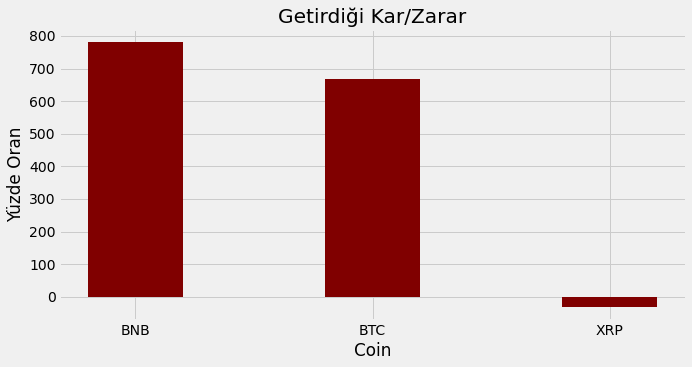

In [212]:
x = list()
y = list()

for i in test_sonuc:
    x.append(i[0])
    y.append(((i[2]-i[1])/i[1])*100)
    
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)
 
plt.xlabel("Coin")
plt.ylabel("Yüzde Oran")
plt.title("Getirdiği Kar/Zarar")
plt.show()

In [215]:
def graph(name,islemler):
    x_sell = list()
    y_sell = list()

    x_buy = list()
    y_buy = list()

    x_stop = list()
    y_stop = list()


    for i in islemler:
        if (i != islemler[-1]):

            if i[1] == "al":
                x_buy.append(i[0])
                y_buy.append(i[2])
            elif i[1] == "sat":
                x_sell.append(i[0])
                y_sell.append(i[2])
            elif i[1] == "sat-stop" or i[1] == "al-stop":
                x_stop.append(i[0])
                y_stop.append(i[2])



    index = name_list.index(name)
    test_df = pd.DataFrame({'index':test_coins.iloc[:,index].index, 'Close':test_coins.iloc[:,index].values})
    test_df = test_df.set_index("index")
    test_df.index = pd.to_datetime(test_df.index)            
                
                
                
    plt.figure(figsize=(40,20))
    plt.plot(test_df.index,test_df["Close"])
    plt.plot(x_sell,y_sell,"o",ms = 20,mfc = "red")
    plt.plot(x_buy,y_buy,"o", ms = 20, mfc = "green")
    plt.plot(x_stop,y_stop,"o", ms = 20, mfc = "black")


    plt.plot()

Red , sell order
Green, take order
Black , stop order

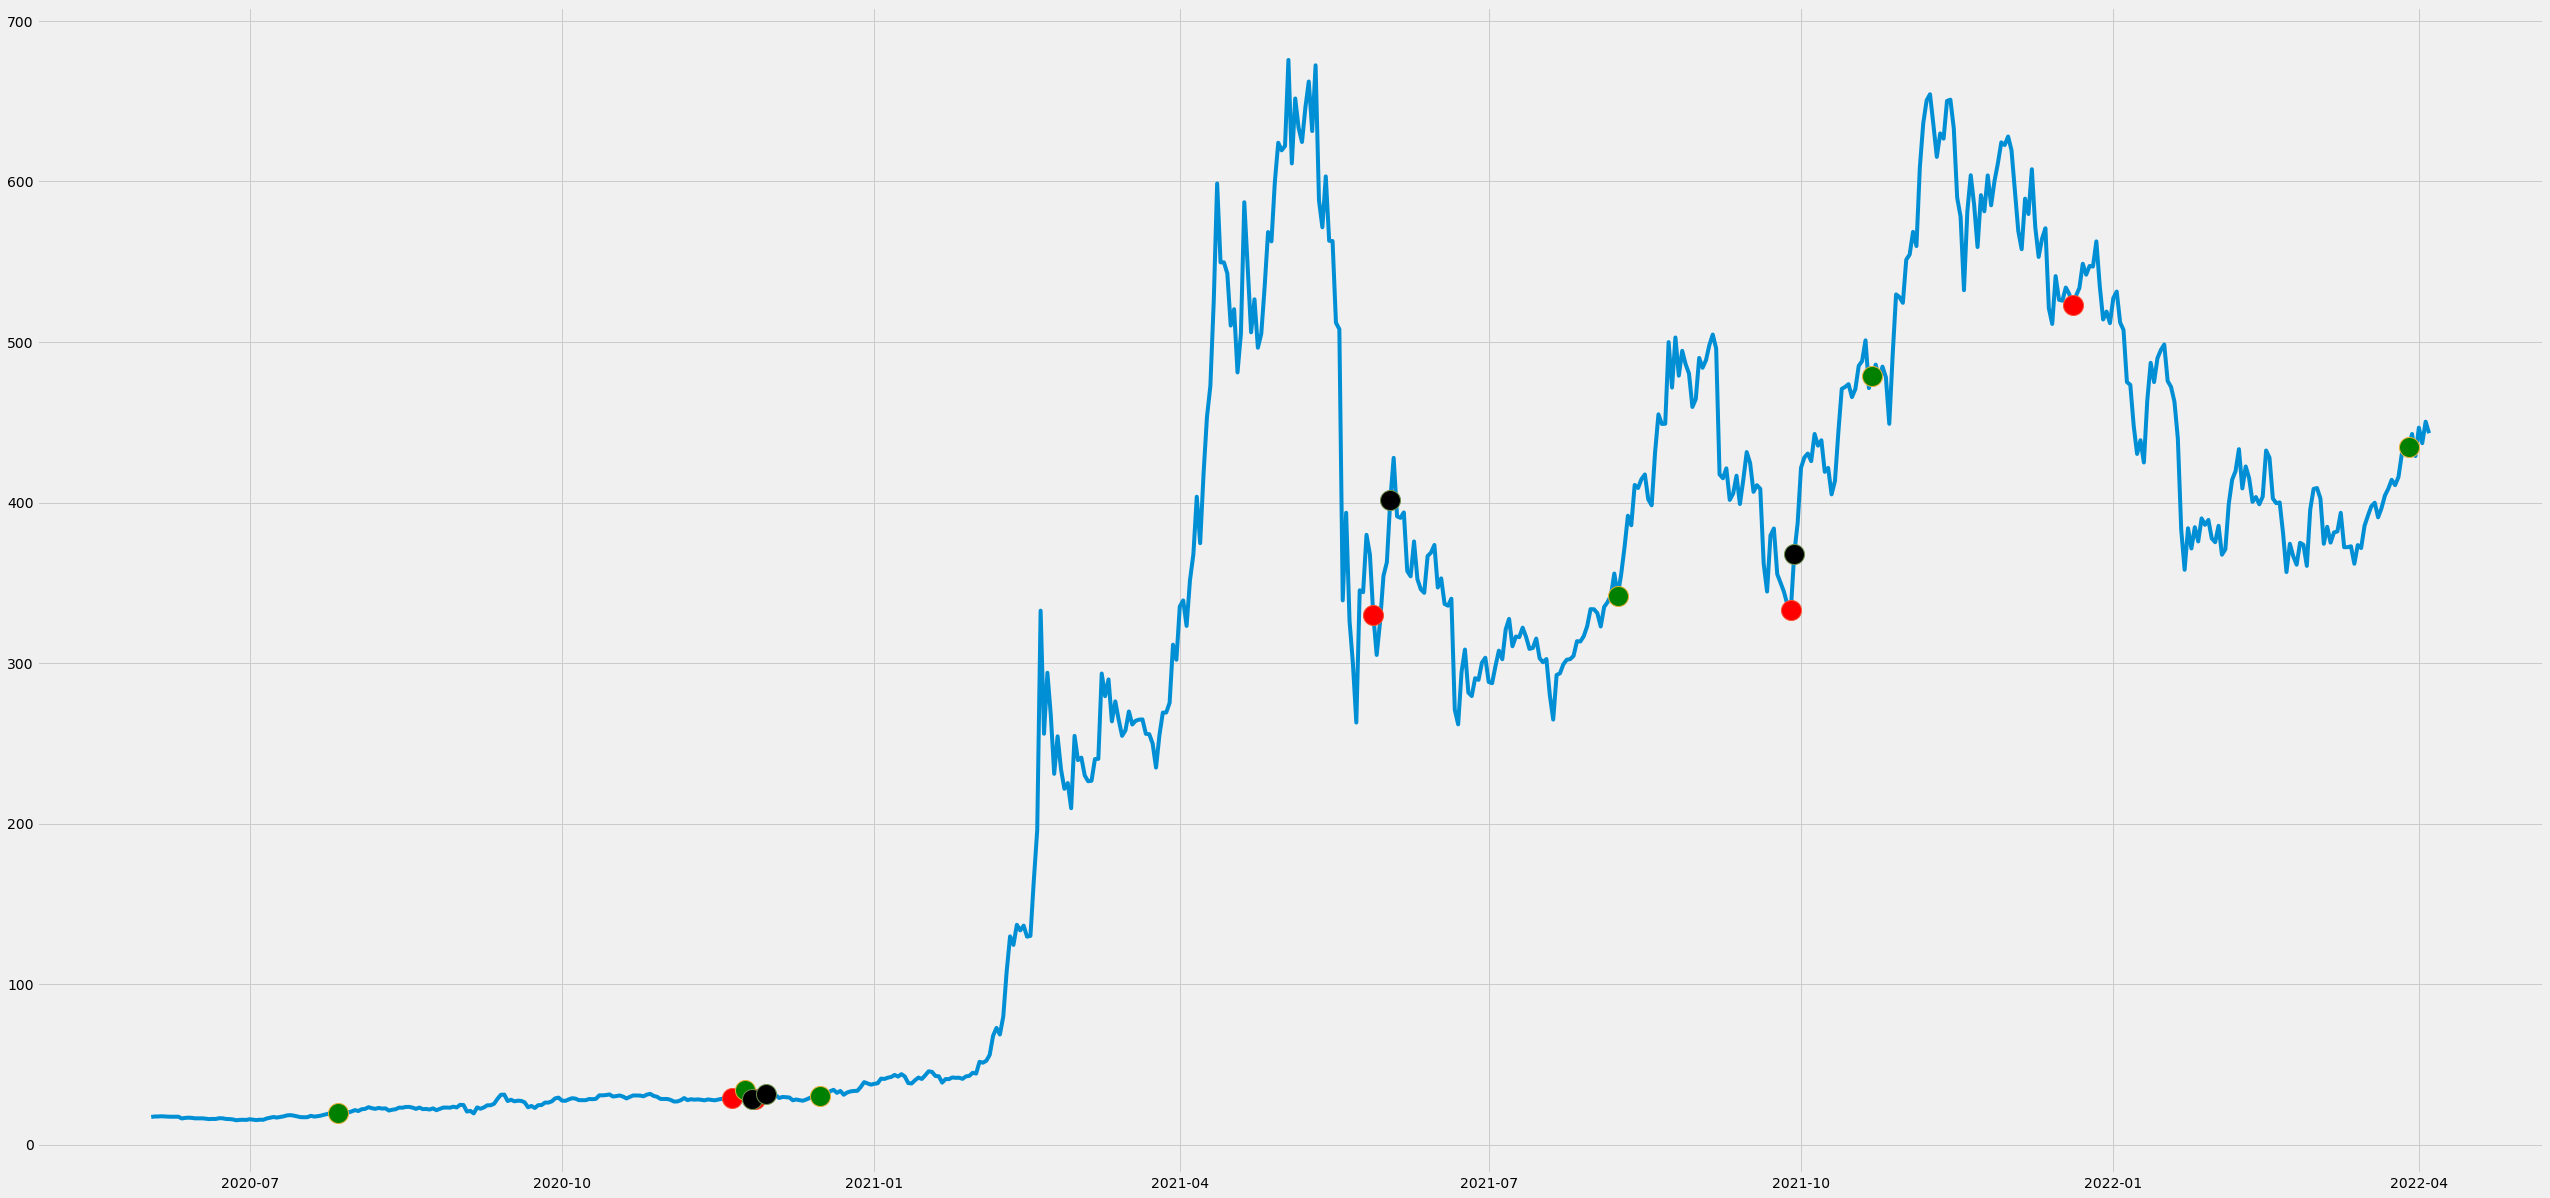

In [216]:
graph("BNB",islemler[0])

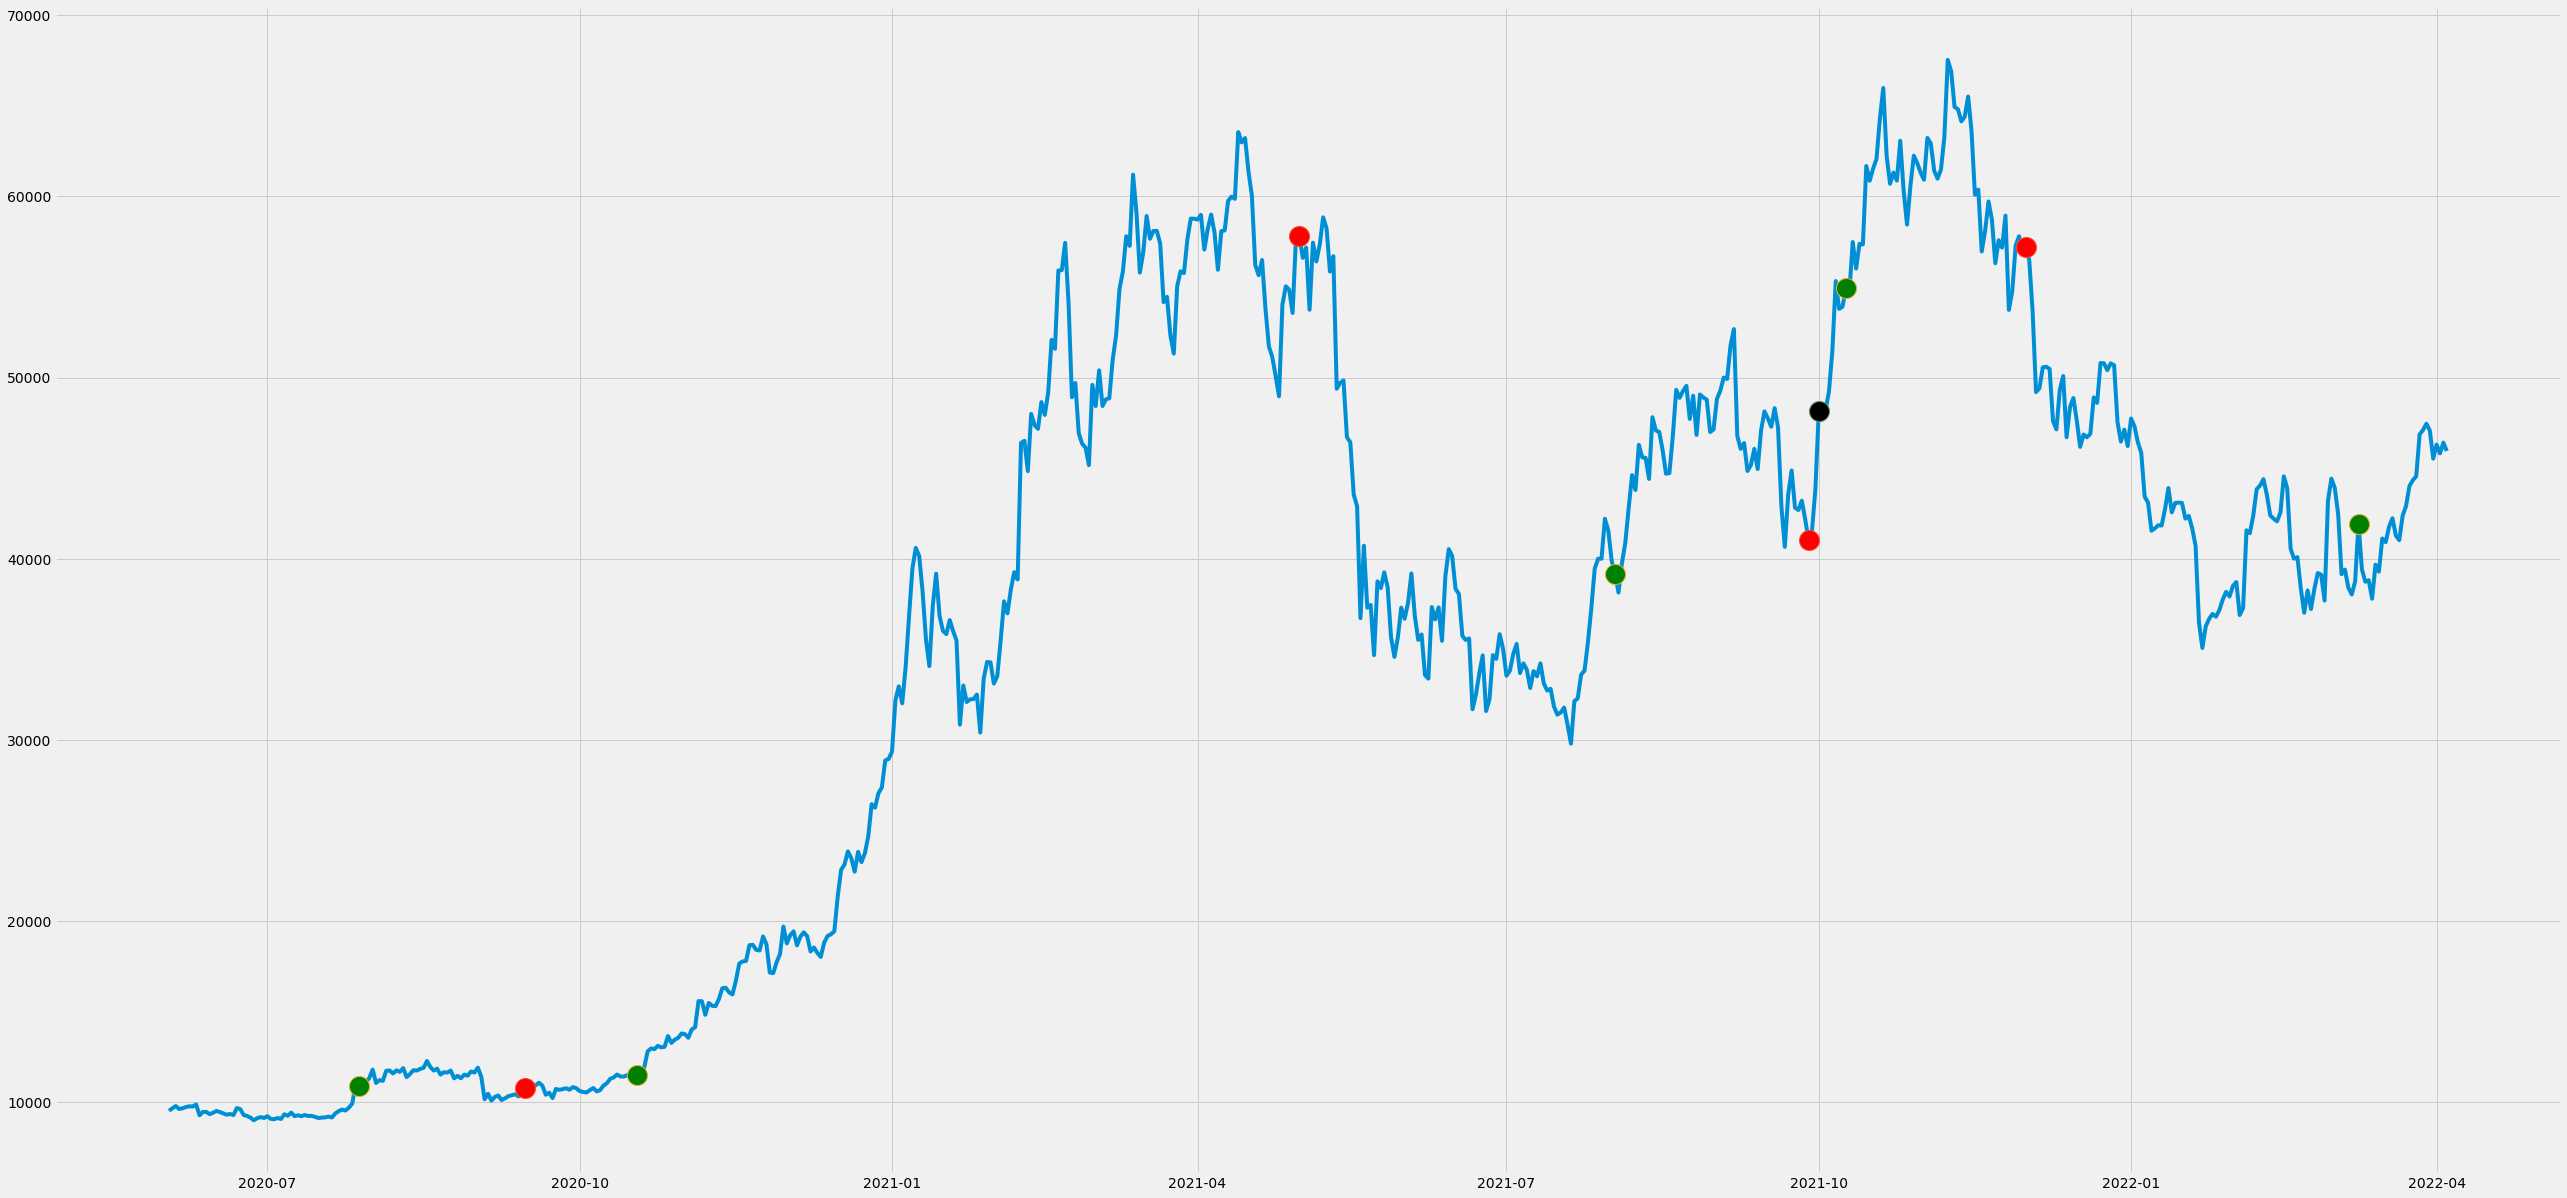

In [217]:
graph("BTC",islemler[1])

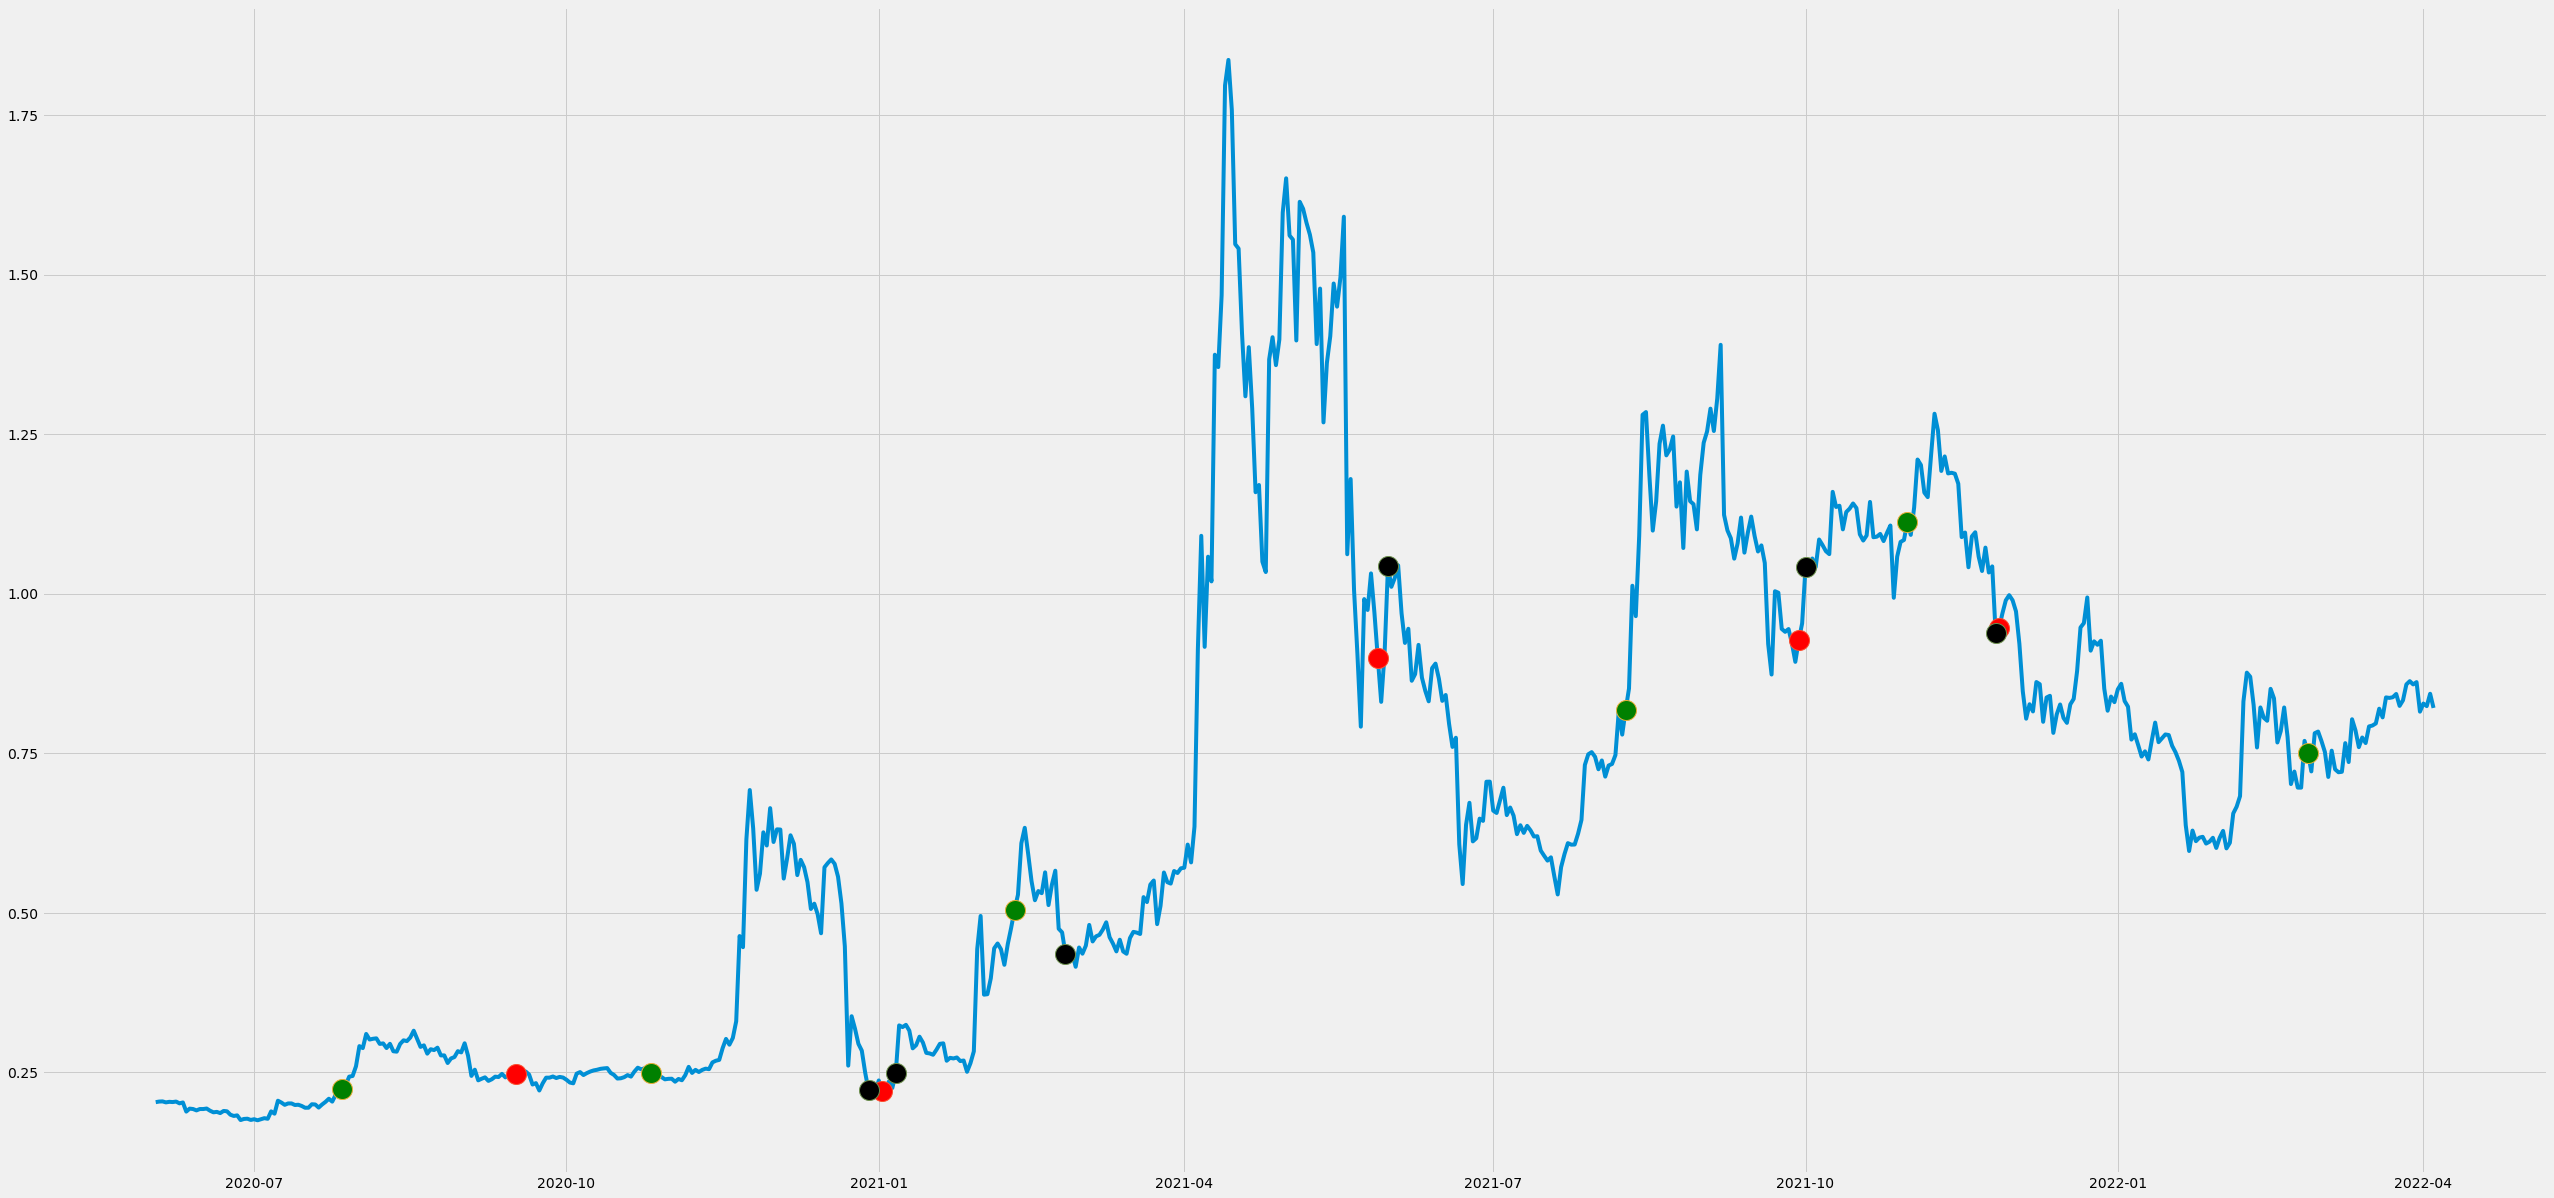

In [218]:
graph("XRP",islemler[2])

Evaluate your model. Provide results, tables, charts, etc.

## References<a class="anchor" id="references"></a>

List all the sources you used during your work.
This includes jupyter notebooks you found on Internet.
Remeber, your work may not be an original one. However, this document must be genuine. Copy and paste kind of deliveries will be punished badly.


**Disclaimer!** <font color='grey'>This notebook was prepared by <student name(s)> as a term project for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>